## A Minimal "MultiWormTracker"

I don't like MATLAB, so I wrote this.

Given an input `.avi` file, this notebook will output the position for each worm at each frame in a `.csv` file. Does not extract any other features or extrapolate between frames where a worm is lost. Edit the parameters in ALL CAPS to fit to your data.

### 1 Imports functions from the `mwt.py` script, which has to be in the same directory as this notebook

The script requires a couple non-standard packages which can be installed at once using `conda install joblib scikit-image ffmpeg`

In [1]:
from mwt import *

/Users/albertwang/Desktop/multi-worm-tracker/mwt.py:32: SyntaxWarning: invalid escape sequence '\,'
  os.system(f"ffmpeg -hide_banner -i '{input_avi}' -vf select='not(mod(n\,180))' -fps_mode vfr -pix_fmt gray '{minute_dir}%06d.tif'")


### 2 Locate files and makes a scratch directory [EDIT]

The notebook requires a scratch directory with a lot of storage that will be filled with the `.avi` file converted into `.tif` for each individual frame. This scratch directory should have up to 75 GB free (51 GB used for a 1h 30' 3000x1500px recording) (36 GB used for a 45' 2500x2400px recording)

In [2]:
#filenames with spaces don't quite work, so please replace with underscores first
INPUT_AVI = '/Volumes/SCRATCH/021825_117-.avi'
SCRATCH_PATH = '/Volumes/SCRATCH'
OUTPUT_PATH = '/Users/albertwang/Desktop'

scratch_dir = make_scratch_dir(INPUT_AVI, SCRATCH_PATH)
scratch_dir

'/Volumes/SCRATCH/021825_117--scratch/'

### 3 Makes a mask by getting one frame for each minute of the recording and getting the median of all those frames (<2' for a 30' 2300x2300px recording)

CPU times: user 16 ms, sys: 5.74 ms, total: 21.7 ms
Wall time: 42.5 ms


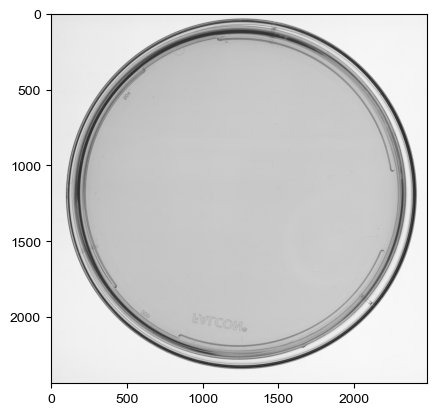

In [3]:
%%time

mask = make_mask(INPUT_AVI, scratch_dir)

### 4 Tries out threshold parameters (check that this worked afterward) (<1' for a 30' 2300x2300px recording)

The threshold parameter varies for different videos depending on the overall brightness of the plate, this funtion will guess thresholds within the guess range and apply them on the minute `.tif` frames from the mask determination

CPU times: user 19.2 s, sys: 5.88 s, total: 25.1 s
Wall time: 27 s


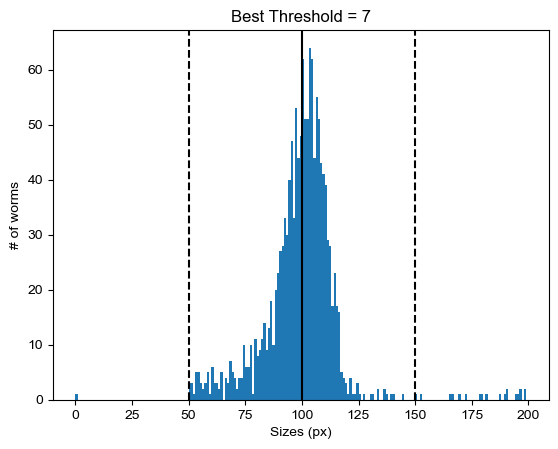

In [4]:
%%time
THRESHOLD_GUESSES = range(2, 11)
SIZE_RANGE = (50, 150)

best_threshold = guess_threshold(scratch_dir, mask, threshold_guesses=THRESHOLD_GUESSES, size_range=SIZE_RANGE)

### 4.5 Just plots what the frames look like with the threshold to double check

CPU times: user 350 ms, sys: 108 ms, total: 458 ms
Wall time: 518 ms


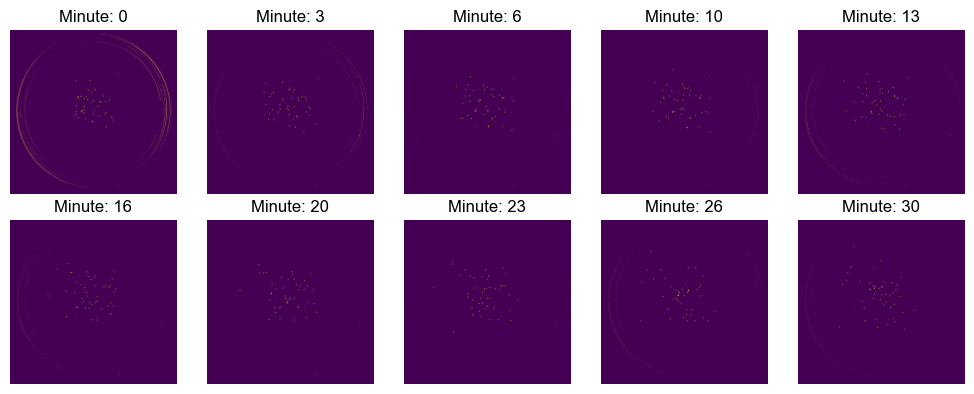

In [5]:
%%time

double_check_threshold(scratch_dir, mask, best_threshold)

### 5 Convert `.avi` to `.tif` with `ffmpeg` (<2' for a 30' 2300x2300px recording)

In [ ]:
%%time

convert_to_tif(INPUT_AVI, scratch_dir)

### 6 Detect worms for each frame (<3' for a 30' 2300x2300px recording)

In [ ]:
%%time
ECCENTRICITY_RANGE = (0.5, 1)

detect_worms(scratch_dir, mask, best_threshold, size_range=SIZE_RANGE, ecc_range=ECCENTRICITY_RANGE)

### 7 Link worms between each frame into a `.csv` (<1' for a 30' 2300x2300px recording)

In [ ]:
%%time
MAX_SPEED = 0.6

link_worms(scratch_dir, max_speed=MAX_SPEED)

### 8 Trim out short tracks

Removes tracks that are too short and move too little

In [ ]:
MIN_SECS_TRACKED = 5
MIN_AREA_TRACKED = 1

trim_csv(scratch_dir, min_secs_tracked=MIN_SECS_TRACKED, min_area_tracked=MIN_AREA_TRACKED)

### 9 One final visualization

In [ ]:
plot_tracks(scratch_dir, mask)

### 10 Copy all files to the output folder (must run this cell to save!)

In [ ]:
save_output(INPUT_AVI, scratch_dir, OUTPUT_PATH, best_threshold, SIZE_RANGE,
            ECCENTRICITY_RANGE, MAX_SPEED, MIN_SECS_TRACKED, MIN_AREA_TRACKED)

### 11 Delete the scratch directory on your own

In [ ]:
#os.system(f'rm -rf {scratch_dir}')